In [ ]:
"%run -i \"D:\\Courses\\2019 Fall (Processing)\\CS-596 Machine Learning\\Assignments\\Assignment 3\\My Code\\main_part1.py\""


In [6]:
import importlib
importlib.reload(my_FNN_Model)

<module 'my_FNN_Model' from 'D:\\Courses\\2019 Fall (Processing)\\CS-596 Machine Learning\\Assignments\\Assignment4&5\\MyCode\\my_FNN_Model.py'>

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import time
# import tensorflow.compat.v1 as tf
from sklearn import preprocessing

import util
import my_FNN_Model

import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


# Part I

## Using FNN Model

In [2]:
def import_data_training():
    # load (downloaded if needed) the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # transform each image from 28 by28 to a 784 pixel vector
    pixel_count = x_train.shape[1] * x_train.shape[2]
    x_train = x_train.reshape(x_train.shape[0], pixel_count).astype('float32')
    # normalize inputs from gray scale of 0-255 to values between 0-1
    x_train = x_train / 255
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=10000, random_state=34)
    
    #Convert Labels to One hot
    le = preprocessing.LabelEncoder()
    int_encoded = le.fit_transform(y_train)
    oe = preprocessing.OneHotEncoder(categories='auto')
    oe.fit(int_encoded.reshape(len(int_encoded), 1))
    y_train = oe.transform(y_train.reshape(len(y_train),1)).toarray()
    y_test = oe.transform(y_test.reshape(len(y_test),1)).toarray()

    return x_train, y_train, x_test, y_test, oe

def write_to_log(FNN, t):
    FNN.train_writer.add_summary(FNN.summary,t)

#### Load Data

In [55]:
x_train, y_train, x_test, y_test, oe  = import_data_training()

#### Train a model

In [4]:
# training_epoch = 20
training_epoch = 20
# LEARNING_RATE =  0.001
LEARNING_RATE =  0.1
HIDDEN_LAYER_SIZE = 120
# HIDDEN_LAYER_SIZE = 300
HIDDEN_LAYER_NUM = 2
# BATCH_SIZE = 400
BATCH_SIZE = 100
REGULARIZATION = 0.1
IMAGE_PIXELS = 784
CLASSES = 10

network_params = {'LearningRate':LEARNING_RATE, 'reg':REGULARIZATION, 'HiddenLayerNum':\
                  HIDDEN_LAYER_NUM,'HiddenLayerSize': HIDDEN_LAYER_SIZE}

FNN = my_FNN_Model.FNN_Model(CLASSES, IMAGE_PIXELS, network_params)

for epoch in range(training_epoch):
    avg_cost = 0
    NumberOfInputs, _ = x_train.shape
    total_batch = int(NumberOfInputs / BATCH_SIZE)

    for i in range(total_batch):
        Input_batch = x_train[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        Output_batch = y_train[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        cost = FNN.train_step(Input_batch,Output_batch)
        avg_cost += cost/total_batch
    print("Epoch: {}  =====> Cost = {}".format(epoch, avg_cost))
# test model
predicted_output = FNN.predict(x_test, y_test)
correct_prediction = np.equal(np.argmax(predicted_output,1), np.argmax(y_test,1))
# print(correct_prediction)
accuracy = np.sum(correct_prediction.astype(float))/np.size(correct_prediction)
print('Accuracy is {}'.format(accuracy))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch: 0  =====> Cost = 0.4723491078317165
Epoch: 1  =====> Cost = 0.22114836426079248
Epoch: 2  =====> Cost = 0.16613406105339515
Epoch: 3  =====> Cost = 0.13493298032134765
Epoch: 4  =====> Cost = 0.1135764225125312
Epoch: 5  =====> Cost = 0.09741179250180726
Epoch: 6  =====> Cost = 0.08447762292437254
Epoch: 7  =====> Cost = 0.07386553455516695
Epoch: 8  =====> Cost = 0.0648951812274754
Epoch: 9  =====> Cost = 0.05714062559418381
Epoch: 10  =====> Cost = 0.05046048135217276
Epoch: 11  =====> Cost = 0.04460726846521723
Epoch: 12  =====> Cost = 0.039435901597142185
Epoch: 13  =====> Cost = 0.03488931827619672
Epoch: 14  =====> Cost = 0.030904609950026526
Epoch: 15  =====> Cost = 0.027357859155163165
Epoch: 16  =====> Cost = 0.024203580216038963
Epoch: 17  =====> Cost = 0.021486998920328935
Epoch: 18  =====> Cost = 0.019089352817973096
Epoch: 19  =====> Cost = 0.016928327654604815
Accuracy is 0.9688


In [ ]:
le = preprocessing.LabelEncoder()
int_encoded = le.fit_transform(y_train)
oe = preprocessing.OneHotEncoder(categories='auto')
oe.fit(int_encoded.reshape(len(int_encoded), 1))
y_train = oe.transform(y_train.reshape(len(y_train),1)).toarray()
y_test = oe.transform(y_test.reshape(len(y_test),1)).toarray()

In [122]:
y_test_label = [x[0] for x in oe.inverse_transform(y_test)]
y_pred_label = [x[0] for x in oe.inverse_transform(predicted_output)]
conf_matrix, accuracy, recall_array, precision_array = util.func_confusion_matrix(y_test_label,y_pred_label)

In [42]:
np.savetxt("./conf.csv",conf_matrix, fmt='%d',delimiter=',')

np.savetxt("./Recall.csv",recall_array, fmt='%.5f',delimiter=',')

np.savetxt("./Precision.csv",precision_array, fmt='%.5f',delimiter=',')


### Visiualize Wrong Images

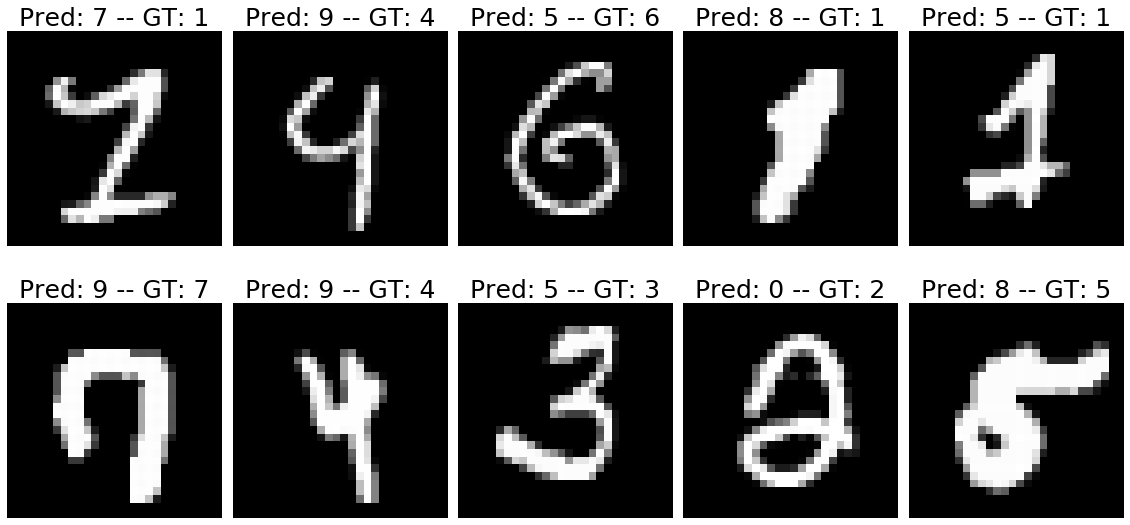

In [129]:
wrong_img = np.not_equal(np.argmax(Estimated_output,1), np.argmax(y_test,1))
wrong_img = np.where(wrong_img)[0]

fig,ax = plt.subplots(2,5,figsize=(20,10))
fig.subplots_adjust(hspace=0, wspace=0.05)
for count in range(10):
    img = np.copy(x_test[wrong_img[count]])
    img = np.asarray(np.reshape(img,[28,28]))
    img = (img * 255).astype(np.uint8)
    img =Image.fromarray(img, 'L')
    ax[count%2][count//2].imshow(img,cmap='gray')
    ax[count%2][count//2].axis('off')
    title = "Pred: {} -- GT: {}".format(y_pred_label[wrong_img[count]],y_test_label[wrong_img[count]])
    ax[count%2][count//2].set_title(title,fontsize= 25)
plt.show()

# Temporary Code

In [121]:
# (x_look,y_look), (_,_) = mnist.load_data()
# _, x_look, _, y_look = train_test_split(x_look, y_look, test_size=10000, random_state=34)

# # arr = np.asarray(x_look[0].reshape(28,28))
# # arr = x_look[10]*255
# arr = x_look[0]
# plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
# y_look[0]


predicted_output[0]

array([-2.5520625, -2.8161325,  2.1710415, -1.1229757, -4.6416435,
        4.2943754, 15.715489 , -9.9012785,  3.8475738, -6.125631 ],
      dtype=float32)